# Разработка системы распознавания предметов интерьера в потоковом видео
## Часть 5: Метрики и сравнение архитектур
### Воропаев Роберт, 2020

В этой части проводится исселедование статистики и полученных метрик разных моделей при обучении.

In [1]:
%matplotlib inline

#System
import os
import shutil

#Base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from skimage.io import imread, imshow, imsave


#Seed
seed = 99
np.random.seed(seed)
random.seed(seed)

## Загрузка данных 

### Логи обучения 

In [2]:
unet_512_1 = pd.read_csv("callbacks/Unet_512_1_06.03_23-34/logger.csv")
unet_512_2 = pd.read_csv("callbacks/Unet_512_2_06.04_03-58/logger.csv")
unet_512_3 = pd.read_csv("callbacks/Unet_512_3_06.04_09-17/logger.csv")
unet_512_4 = pd.read_csv("callbacks/Unet_512_4_06.04_16-05/logger.csv")
unet_512_5 = pd.read_csv("callbacks/Unet_512_5_06.05_00-19/logger.csv")

unet_1024_1 = pd.read_csv("callbacks/Unet_1024_1_06.03_23-34/logger.csv")
unet_1024_2 = pd.read_csv("callbacks/Unet_1024_2_06.04_04-01/logger.csv")
unet_1024_3 = pd.read_csv("callbacks/Unet_1024_3_06.04_10-11/logger.csv")
unet_1024_4 = pd.read_csv("callbacks/Unet_1024_4_06.04_18-09/logger.csv")
unet_1024_5 = pd.read_csv("callbacks/Unet_1024_5_06.05_03-48/logger.csv")

unet_2048_1 = pd.read_csv("callbacks/Unet_2048_1_06.05_19-04/logger.csv")
unet_2048_2 = pd.read_csv("callbacks/Unet_2048_2_06.06_00-27/logger.csv")
unet_2048_3 = pd.read_csv("callbacks/Unet_2048_3_06.06_17-04/logger.csv")
unet_2048_4 = pd.read_csv("callbacks/Unet_2048_4_06.05_19-16/logger.csv")
unet_2048_5 = pd.read_csv("callbacks/Unet_2048_5_06.10_16-49/logger.csv")

unet_1024_bs_10 = pd.read_csv("callbacks/Unet_1024_3_bs_10_06.08_08-33/logger.csv")

unet_1024_bn = pd.read_csv("callbacks/Unet_1024_batch_norm_3_06.07_08-53/logger.csv")
unet_1024_bn_after = pd.read_csv("callbacks/Unet_1024_batch_norm_after_3_06.09_08-10/logger.csv")

unet_1024_nearest = pd.read_csv("callbacks/Unet_1024_nearest_3_06.09_23-24/logger.csv")
unet_1024_tc = pd.read_csv("callbacks/Unet_1024_conv_trans_3_06.07_23-41/logger.csv")

unet_1024_do_01 = pd.read_csv("callbacks/Unet_1024_dropout_3_dp_01_06.07_08-44/logger.csv")
unet_1024_do_02 = pd.read_csv("callbacks/Unet_1024_dropout_3_dp_02_06.07_18-20/logger.csv")
unet_1024_do_03 = pd.read_csv("callbacks/Unet_1024_dropout_3_dp_03_06.08_03-44/logger.csv")
unet_1024_do_04 = pd.read_csv("callbacks/Unet_1024_dropout_3_dp_04_06.08_13-10/logger.csv")
unet_1024_do_05 = pd.read_csv("callbacks/Unet_1024_dropout_3_dp_05_06.08_22-31/logger.csv")

unet_1024_do_nearest = pd.read_csv("callbacks/Unet_1024_dropout_nearest_3_06.11_15-44/logger.csv")

### Время работы 

In [3]:
unet_512_1_time = float(open("callbacks/Unet_512_1_06.03_23-34/time.txt").read())
unet_512_2_time = float(open("callbacks/Unet_512_2_06.04_03-58/time.txt").read())
unet_512_3_time = float(open("callbacks/Unet_512_3_06.04_09-17/time.txt").read())
unet_512_4_time = float(open("callbacks/Unet_512_4_06.04_16-05/time.txt").read())
unet_512_5_time = float(open("callbacks/Unet_512_5_06.05_00-19/time.txt").read())

unet_1024_1_time = float(open("callbacks/Unet_1024_1_06.03_23-34/time.txt").read())
unet_1024_2_time = float(open("callbacks/Unet_1024_2_06.04_04-01/time.txt").read())
unet_1024_3_time = float(open("callbacks/Unet_1024_3_06.04_10-11/time.txt").read())
unet_1024_4_time = float(open("callbacks/Unet_1024_4_06.04_18-09/time.txt").read())
unet_1024_5_time = float(open("callbacks/Unet_1024_5_06.05_03-48/time.txt").read())

unet_2048_1_time = float(open("callbacks/Unet_2048_1_06.05_19-04/time.txt").read())
unet_2048_2_time = float(open("callbacks/Unet_2048_2_06.06_00-27/time.txt").read())
unet_2048_3_time = float(open("callbacks/Unet_2048_3_06.06_17-04/time.txt").read())
unet_2048_4_time = float(open("callbacks/Unet_2048_4_06.05_19-16/time.txt").read())
unet_2048_5_time = float(open("callbacks/Unet_2048_5_06.10_16-49/time.txt").read())

unet_1024_bs_10_time = float(open("callbacks/Unet_1024_3_bs_10_06.08_08-33/time.txt").read())

unet_1024_bn_time = float(open("callbacks/Unet_1024_batch_norm_3_06.07_08-53/time.txt").read())
unet_1024_bn_after_time = float(open("callbacks/Unet_1024_batch_norm_after_3_06.09_08-10/time.txt").read())

unet_1024_nearest_time = float(open("callbacks/Unet_1024_nearest_3_06.09_23-24/time.txt").read())
unet_1024_tc_time = float(open("callbacks/Unet_1024_conv_trans_3_06.07_23-41/time.txt").read())

unet_1024_do_01_time = float(open("callbacks/Unet_1024_dropout_3_dp_01_06.07_08-44/time.txt").read())
unet_1024_do_02_time = float(open("callbacks/Unet_1024_dropout_3_dp_02_06.07_18-20/time.txt").read())
unet_1024_do_03_time = float(open("callbacks/Unet_1024_dropout_3_dp_03_06.08_03-44/time.txt").read())
unet_1024_do_04_time = float(open("callbacks/Unet_1024_dropout_3_dp_04_06.08_13-10/time.txt").read())
unet_1024_do_05_time = float(open("callbacks/Unet_1024_dropout_3_dp_05_06.08_22-31/time.txt").read())

unet_1024_do_nearest_time = float(open("callbacks/Unet_1024_dropout_nearest_3_06.11_15-44/time.txt").read())

### Количество параметров 

In [4]:
unet_512_1_param = float(open("callbacks/Unet_512_1_06.03_23-34/param_count.txt").read())
unet_512_2_param = float(open("callbacks/Unet_512_2_06.04_03-58/param_count.txt").read())
unet_512_3_param = float(open("callbacks/Unet_512_3_06.04_09-17/param_count.txt").read())
unet_512_4_param = float(open("callbacks/Unet_512_4_06.04_16-05/param_count.txt").read())
unet_512_5_param = float(open("callbacks/Unet_512_5_06.05_00-19/param_count.txt").read())

unet_1024_1_param = float(open("callbacks/Unet_1024_1_06.03_23-34/param_count.txt").read())
unet_1024_2_param = float(open("callbacks/Unet_1024_2_06.04_04-01/param_count.txt").read())
unet_1024_3_param = float(open("callbacks/Unet_1024_3_06.04_10-11/param_count.txt").read())
unet_1024_4_param = float(open("callbacks/Unet_1024_4_06.04_18-09/param_count.txt").read())
unet_1024_5_param = float(open("callbacks/Unet_1024_5_06.05_03-48/param_count.txt").read())

unet_2048_1_param = float(open("callbacks/Unet_2048_1_06.05_19-04/param_count.txt").read())
unet_2048_2_param = float(open("callbacks/Unet_2048_2_06.06_00-27/param_count.txt").read())
unet_2048_3_param = float(open("callbacks/Unet_2048_3_06.06_17-04/param_count.txt").read())
unet_2048_4_param = float(open("callbacks/Unet_2048_4_06.05_19-16/param_count.txt").read())
unet_2048_5_param = float(open("callbacks/Unet_2048_5_06.10_16-49/param_count.txt").read())

unet_1024_bs_10_param = float(open("callbacks/Unet_1024_3_bs_10_06.08_08-33/param_count.txt").read())

unet_1024_bn_param = float(open("callbacks/Unet_1024_batch_norm_3_06.07_08-53/param_count.txt").read())
unet_1024_bn_after_param = float(open("callbacks/Unet_1024_batch_norm_after_3_06.09_08-10/param_count.txt").read())

unet_1024_nearest_param = float(open("callbacks/Unet_1024_nearest_3_06.09_23-24/param_count.txt").read())
unet_1024_tc_param = float(open("callbacks/Unet_1024_conv_trans_3_06.07_23-41/param_count.txt").read())

unet_1024_do_01_param = float(open("callbacks/Unet_1024_dropout_3_dp_01_06.07_08-44/param_count.txt").read())
unet_1024_do_02_param = float(open("callbacks/Unet_1024_dropout_3_dp_02_06.07_18-20/param_count.txt").read())
unet_1024_do_03_param = float(open("callbacks/Unet_1024_dropout_3_dp_03_06.08_03-44/param_count.txt").read())
unet_1024_do_04_param = float(open("callbacks/Unet_1024_dropout_3_dp_04_06.08_13-10/param_count.txt").read())
unet_1024_do_05_param = float(open("callbacks/Unet_1024_dropout_3_dp_05_06.08_22-31/param_count.txt").read())

unet_1024_do_nearest_param = float(open("callbacks/Unet_1024_dropout_nearest_3_06.11_15-44/param_count.txt").read())

### Качество работы 

In [5]:
unet_512_1_max = unet_512_1.val_jaccard_coef.max()
unet_512_2_max = unet_512_2.val_jaccard_coef.max()
unet_512_3_max = unet_512_3.val_jaccard_coef.max()
unet_512_4_max = unet_512_4.val_jaccard_coef.max()
unet_512_5_max = unet_512_5.val_jaccard_coef.max()

unet_1024_1_max = unet_1024_1.val_jaccard_coef.max()
unet_1024_2_max = unet_1024_2.val_jaccard_coef.max()
unet_1024_3_max = unet_1024_3.val_jaccard_coef.max()
unet_1024_4_max = unet_1024_4.val_jaccard_coef.max()
unet_1024_5_max = unet_1024_5.val_jaccard_coef.max()

unet_2048_1_max = unet_2048_1.val_jaccard_coef.max()
unet_2048_2_max = unet_2048_2.val_jaccard_coef.max()
unet_2048_3_max = unet_2048_3.val_jaccard_coef.max()
unet_2048_4_max = unet_2048_4.val_jaccard_coef.max()
unet_2048_5_max = unet_2048_5.val_jaccard_coef.max()

unet_1024_bs_10_max = unet_1024_bs_10.val_jaccard_coef.max()

unet_1024_bn_max = unet_1024_bn.val_jaccard_coef.max()
unet_1024_bn_after_max = unet_1024_bn_after.val_jaccard_coef.max()

unet_1024_nearest_max = unet_1024_nearest.val_jaccard_coef.max()
unet_1024_tc_max = unet_1024_tc.val_jaccard_coef.max()

unet_1024_do_01_max = unet_1024_do_01.val_jaccard_coef.max()
unet_1024_do_02_max = unet_1024_do_02.val_jaccard_coef.max()
unet_1024_do_03_max = unet_1024_do_03.val_jaccard_coef.max()
unet_1024_do_04_max = unet_1024_do_04.val_jaccard_coef.max()
unet_1024_do_05_max = unet_1024_do_05.val_jaccard_coef.max()

unet_1024_do_nearest_max = unet_1024_do_nearest.val_jaccard_coef.max()

## Сравнение архитектур 

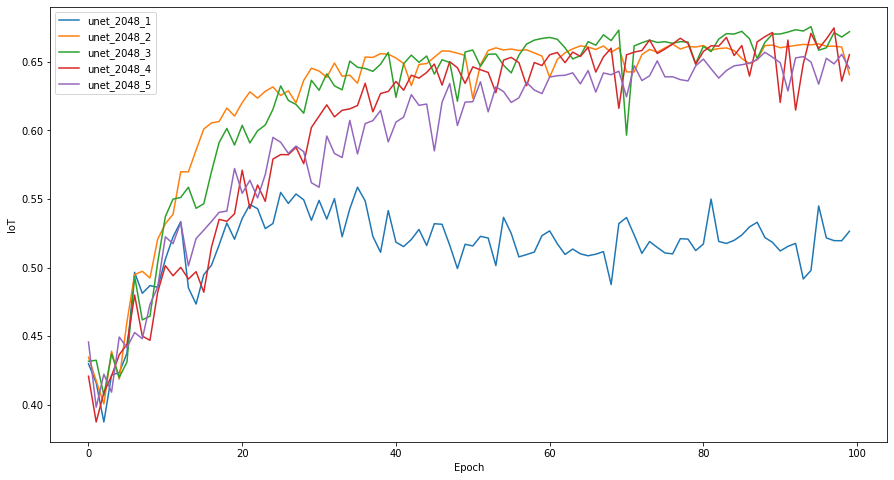

In [6]:
plt.figure(figsize=(15, 8))

# plt.plot(unet_512_1.epoch, unet_512_1.val_jaccard_coef, label="unet_512_1")
# plt.plot(unet_512_2.epoch, unet_512_2.val_jaccard_coef, label="unet_512_2")
# plt.plot(unet_512_3.epoch, unet_512_3.val_jaccard_coef, label="unet_512_3")
# plt.plot(unet_512_4.epoch, unet_512_4.val_jaccard_coef, label="unet_512_4")
# plt.plot(unet_512_5.epoch, unet_512_5.val_jaccard_coef, label="unet_512_5")

# plt.plot(unet_1024_1.epoch, unet_1024_1.val_jaccard_coef, label="unet_1024_1")
# plt.plot(unet_1024_2.epoch, unet_1024_2.val_jaccard_coef, label="unet_1024_2")
# plt.plot(unet_1024_3.epoch, unet_1024_3.val_jaccard_coef, label="unet_1024_3")
# plt.plot(unet_1024_4.epoch, unet_1024_4.val_jaccard_coef, label="unet_1024_4")
# plt.plot(unet_1024_5.epoch, unet_1024_5.val_jaccard_coef, label="unet_1024_5")

plt.plot(unet_2048_1.epoch, unet_2048_1.val_jaccard_coef, label="unet_2048_1")
plt.plot(unet_2048_2.epoch, unet_2048_2.val_jaccard_coef, label="unet_2048_2")
plt.plot(unet_2048_3.epoch, unet_2048_3.val_jaccard_coef, label="unet_2048_3")
plt.plot(unet_2048_4.epoch, unet_2048_4.val_jaccard_coef, label="unet_2048_4")
plt.plot(unet_2048_5.epoch, unet_2048_5.val_jaccard_coef, label="unet_2048_5")

plt.xlabel("Epoch")
plt.ylabel("IoT")
plt.legend()

In [7]:
time_512 = [unet_512_1_time, unet_512_2_time, unet_512_3_time, unet_512_4_time, unet_512_5_time]
time_1024 = [unet_1024_1_time, unet_1024_2_time, unet_1024_3_time, unet_1024_4_time, unet_1024_5_time]
time_2048 = [unet_2048_1_time, unet_2048_2_time, unet_2048_3_time, unet_2048_4_time, unet_2048_5_time]

param_512 = [unet_512_1_param, unet_512_2_param, unet_512_3_param, unet_512_4_param, unet_512_5_param]
param_1024 = [unet_1024_1_param, unet_1024_2_param, unet_1024_3_param, unet_1024_4_param, unet_1024_5_param]
param_2048 = [unet_2048_1_param, unet_2048_2_param, unet_2048_3_param, unet_2048_4_param, unet_2048_5_param]

max_iot_512 = [unet_512_1_max, unet_512_2_max, unet_512_3_max, unet_512_4_max, unet_512_5_max]
max_iot_1024 = [unet_1024_1_max, unet_1024_2_max, unet_1024_3_max, unet_1024_4_max, unet_1024_5_max]
max_iot_2048 = [unet_2048_1_max, unet_2048_2_max, unet_2048_3_max, unet_2048_4_max, unet_2048_5_max]

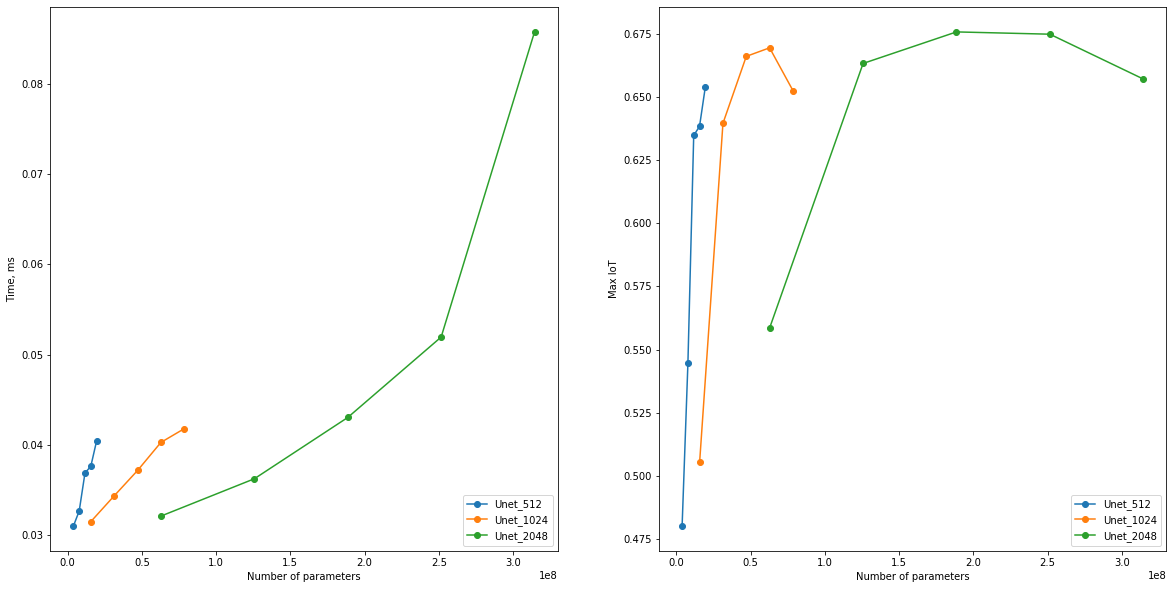

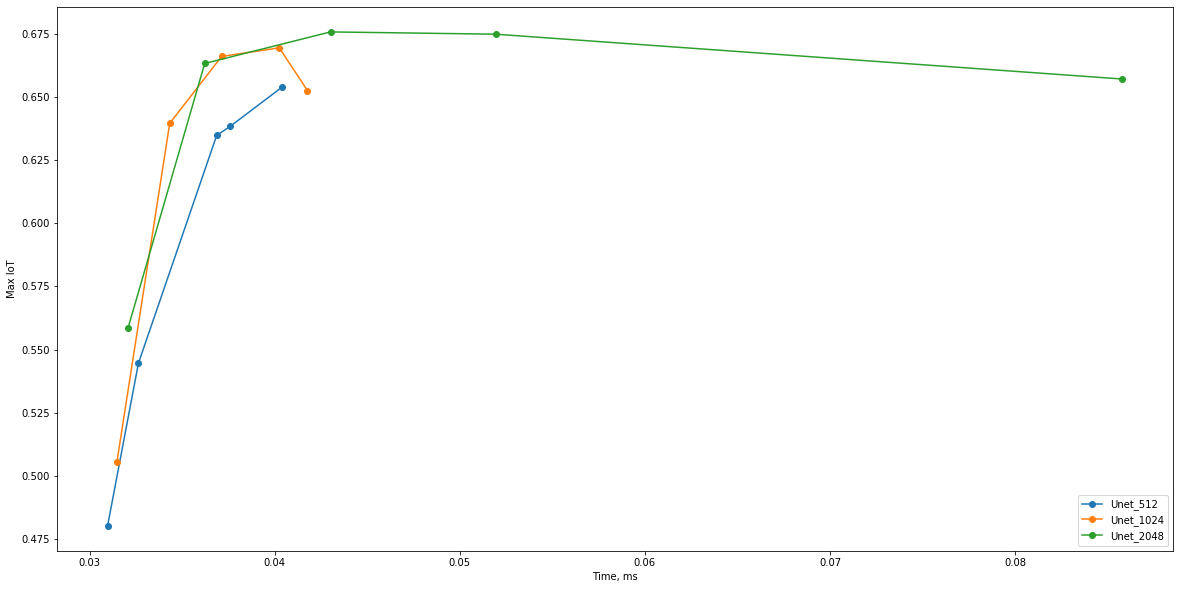

In [8]:
plt.figure(figsize=(20, 10))

plt.subplot(121)

plt.plot(param_512, time_512, "o-", label="Unet_512")
plt.plot(param_1024, time_1024, "o-", label="Unet_1024")
plt.plot(param_2048, time_2048, "o-", label="Unet_2048")

plt.xlabel("Number of parameters")
plt.ylabel("Time, ms")
plt.legend(loc="lower right")

plt.subplot(122)

plt.plot(param_512, max_iot_512, "o-", label="Unet_512")
plt.plot(param_1024, max_iot_1024, "o-", label="Unet_1024")
plt.plot(param_2048, max_iot_2048, "o-", label="Unet_2048")

plt.xlabel("Number of parameters")
plt.ylabel("Max IoT")
plt.legend(loc="lower right")

plt.show()

plt.figure(figsize=(20, 10))

plt.plot(time_512, max_iot_512, "o-", label="Unet_512")
plt.plot(time_1024, max_iot_1024, "o-", label="Unet_1024")
plt.plot(time_2048, max_iot_2048, "o-", label="Unet_2048")

plt.xlabel("Time, ms")
plt.ylabel("Max IoT")
plt.legend(loc="lower right")
plt.show()

## BatchNormalization 

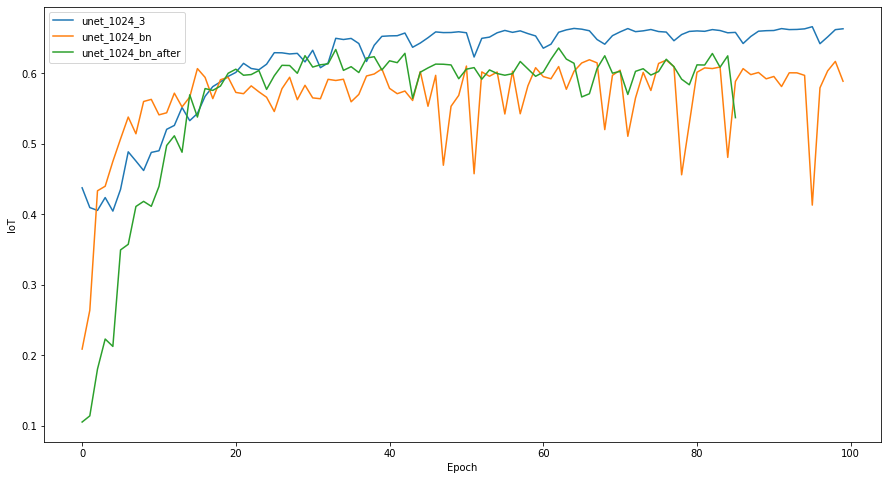

In [9]:
plt.figure(figsize=(15, 8))

plt.plot(unet_1024_3.epoch, unet_1024_3.val_jaccard_coef, label="unet_1024_3")

#plt.plot(unet_1024_bs_10.epoch, unet_1024_bs_10.val_jaccard_coef, label="unet_1024_3_10")
plt.plot(unet_1024_bn.epoch, unet_1024_bn.val_jaccard_coef, label="unet_1024_bn")
plt.plot(unet_1024_bn_after.epoch, unet_1024_bn_after.val_jaccard_coef, label="unet_1024_bn_after")

plt.xlabel("Epoch")
plt.ylabel("IoT")
plt.legend()

## Методы увеличения размерности 

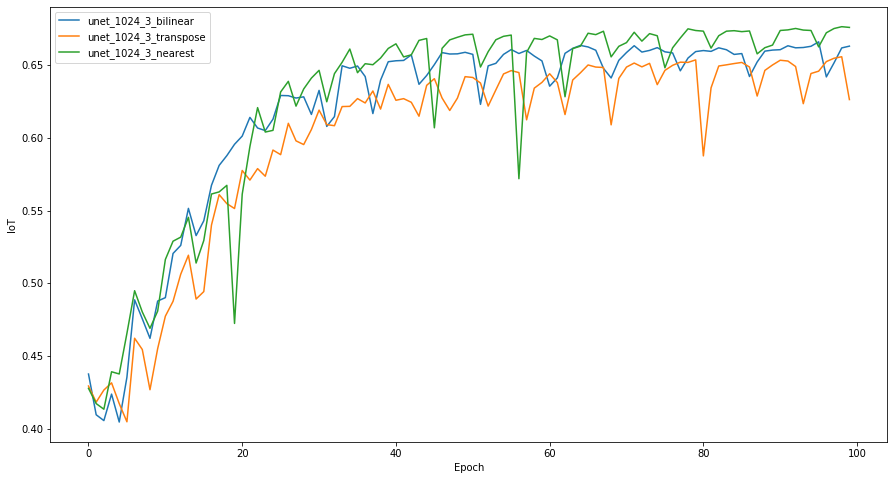

In [13]:
plt.figure(figsize=(15, 8))

plt.plot(unet_1024_3.epoch, unet_1024_3.val_jaccard_coef, label="unet_1024_3_bilinear")

#plt.plot(unet_1024_bs_10.epoch, unet_1024_bs_10.val_jaccard_coef, label="unet_1024_3_10")
plt.plot(unet_1024_tc.epoch, unet_1024_tc.val_jaccard_coef, label="unet_1024_3_transpose")
plt.plot(unet_1024_nearest.epoch, unet_1024_nearest.val_jaccard_coef, label="unet_1024_3_nearest")

plt.xlabel("Epoch")
plt.ylabel("IoT")
plt.legend()

In [11]:
max_iot_upsa = [unet_1024_3_max, unet_1024_nearest_max, unet_1024_tc_max]
max_iot_upsa

[0.6660227179527283, 0.6764358282089233, 0.6557677388191223]

### Dropout 

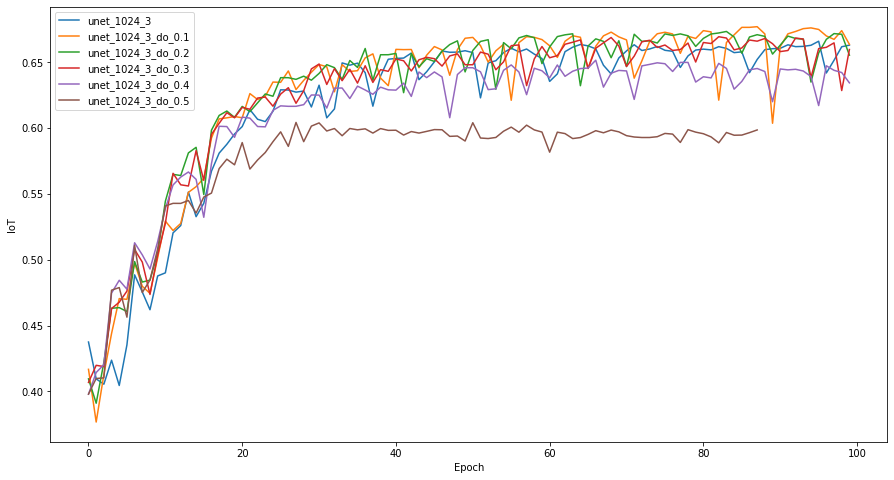

In [13]:
plt.figure(figsize=(15, 8))

plt.plot(unet_1024_3.epoch, unet_1024_3.val_jaccard_coef, label="unet_1024_3")

plt.plot(unet_1024_do_01.epoch, unet_1024_do_01.val_jaccard_coef, label="unet_1024_3_do_0.1")
plt.plot(unet_1024_do_02.epoch, unet_1024_do_02.val_jaccard_coef, label="unet_1024_3_do_0.2")
plt.plot(unet_1024_do_03.epoch, unet_1024_do_03.val_jaccard_coef, label="unet_1024_3_do_0.3")
plt.plot(unet_1024_do_04.epoch, unet_1024_do_04.val_jaccard_coef, label="unet_1024_3_do_0.4")
plt.plot(unet_1024_do_05.epoch, unet_1024_do_05.val_jaccard_coef, label="unet_1024_3_do_0.5")

plt.xlabel("Epoch")
plt.ylabel("IoT")
plt.legend()

In [14]:
max_iot_dropout = [unet_1024_3_max, unet_1024_do_01_max, unet_1024_do_02_max, unet_1024_do_03_max, unet_1024_do_04_max, unet_1024_do_05_max]
dropout_prob = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

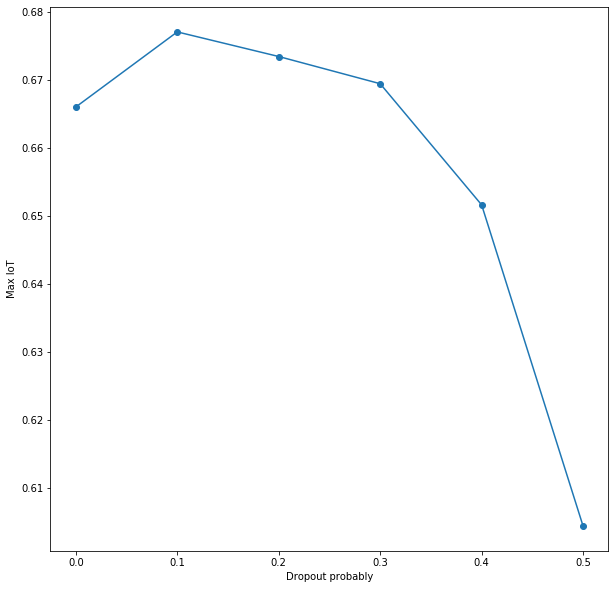

In [15]:
plt.figure(figsize=(10, 10))

plt.plot(dropout_prob, max_iot_dropout, "o-")

plt.ylabel("Max IoT")
plt.xlabel("Dropout probably")
plt.show()

### Объединение лучших моделей

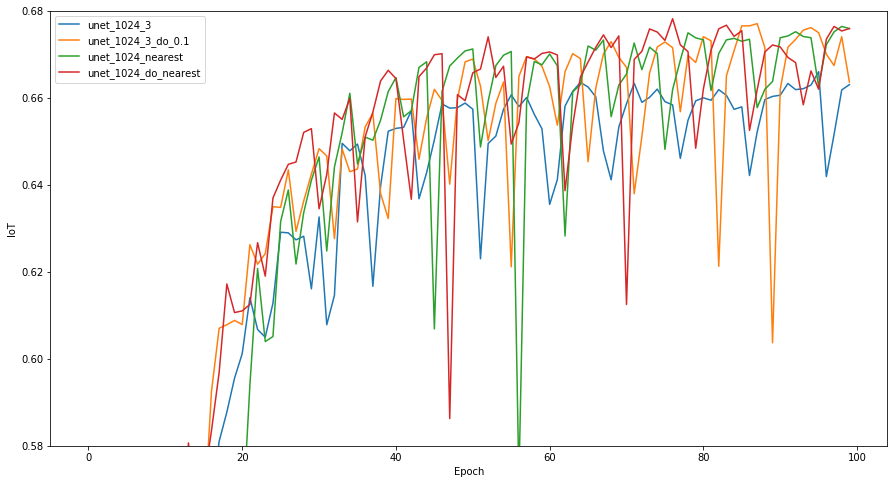

In [23]:
plt.figure(figsize=(15, 8))

plt.plot(unet_1024_3.epoch, unet_1024_3.val_jaccard_coef, label="unet_1024_3")
plt.plot(unet_1024_do_01.epoch, unet_1024_do_01.val_jaccard_coef, label="unet_1024_3_do_0.1")
plt.plot(unet_1024_nearest.epoch, unet_1024_nearest.val_jaccard_coef, label="unet_1024_nearest")
plt.plot(unet_1024_do_nearest.epoch, unet_1024_do_nearest.val_jaccard_coef, label="unet_1024_do_nearest")

plt.ylim((0.58, 0.68))
plt.xlabel("Epoch")
plt.ylabel("IoT")
plt.legend()

In [20]:
max_iot_all = [unet_1024_3_max, unet_1024_do_01_max, unet_1024_nearest_max, unet_1024_do_nearest_max]
max_iot_all

[0.6660227179527283,
 0.6770724058151245,
 0.6764358282089233,
 0.6782176494598389]